In [ ]:
!pip install Pillow



['What   are  different techniques  to  \n', 'gather   information  for  software  development?  Ans: \n', 'Different  techniques  for software  development  \n', 'information    gathering   include   interviews, surveys, \n', 'workshops,    observations,  prototypes,  focus  groups,  \n', 'document    analysis,   user   stories,  use cases, and   \n', 'more.   These  methods involve  interacting  with   \n', 'stakeholders,    users, and  existing  systems to   understand \n', 'needs,   preferences,   and   requirements, \n', 'ultimately    guiding the   software  development  \n', 'process.    2. List verification   and   validation  \n', 'techniques   for   requirements. Ans: Verification  and  \n', 'validation   techniques   for  requirements  include  \n', 'reviewing  documents for errors, walkthroughs   with   \n', 'stakeholders,  prototyping,   simulations, traceability   \n', 'analysis,  use case testing,  model validation,   \n', 'acceptance    testing,  and  gathering  user fe

<ipython-input-66-297130f9568b>:27: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  fontsize = font.getsize(word)[1]
<ipython-input-66-297130f9568b>:67: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  y += int(font.getsize(i)[1] + line_spacing)
<ipython-input-66-297130f9568b>:67: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  y += int(font.getsize(i)[1] + line_spacing)
<ipython-input-66-297130f9568b>:67: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  y += int(font.getsize(i)[1] + line_spacing)
<ipython-input-66-297130f9568b>:67: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  y += int(font.getsize(i)[1] + 

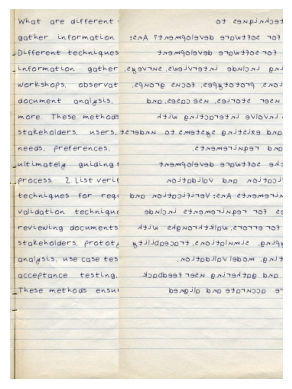

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import random as random

# Load the image
image_path = "input_image.jpg"
output_path = "output_image.jpg"
image = Image.open(image_path)

# Prepare the text to be written
text = "1. What are different techniques to gather information for software development? \n Ans: Different techniques for software development information gathering include interviews, surveys, workshops, observations, prototypes, focus groups, document analysis, user stories, use cases, and more. These methods involve interacting with stakeholders, users, and existing systems to understand needs, preferences, and requirements, ultimately guiding the software development process. 2. List verification and validation techniques for requirements. Ans: Verification and validation techniques for requirements include reviewing documents for errors, walkthroughs with stakeholders, prototyping, simulations, traceability analysis, use case testing, model validation, acceptance testing, and gathering user feedback. These methods ensure accurate and aligned requirements also."
font_path = "custom_font.ttf"  # Replace with the path to your TTF font file
font_size = 15

# Load the custom font
font = ImageFont.truetype(font_path, font_size)

def wrap_text(text, font, max_width):
    words = text.split()
    wrapped = []
    current_line_width=0
    current_line = []

    for word in words[1:]:
        for i in range(0,random.randint(1, 3)):
              word+=" "
        fontsize = font.getsize(word)[1]
        if(current_line_width+len(word)*fontsize<=max_width):
          #add word
          current_line.append(word)

          current_line_width +=len(word)*fontsize
        else:
           current_line.append("\n")
           wrapped.append("".join(current_line))
           current_line = []
           current_line.append(word)
           current_line.append(" ")
           current_line_width = 0



    return  wrapped

text_width =  image.width *1.5
text = wrap_text(text,font,text_width)
print(text)
# Create a drawing object
draw = ImageDraw.Draw(image)

# Determine the position to place the text
#text_width, text_height = draw.textsize(text, font)
image_width, image_height = image.size

#adjust as per requirement
x = 10
y = 10

# Set the color for the text
text_color = (0, 0, 50)  # color, change as needed

line_spacing = 8

# Write the text on the image
for i in text:
  draw.text((x, y), i, font=font, fill=text_color)
  y += int(font.getsize(i)[1] + line_spacing)


def fold_image(image, fold_position):
    # Open the image
    original_image = image
    width, height = original_image.size

    # Calculate the fold line coordinates
    fold_x = int(fold_position * width)

    # Create a new blank image
    folded_image = Image.new("RGB", (width, height), (255, 255, 255))

    # Paste the left side of the original image onto the folded image
    folded_image.paste(original_image.crop((0, 0, fold_x, height)), (0, 0))

    # Create a mirror image of the right side of the original image
    right_side = original_image.crop((fold_x, 0, width, height))
    right_side_mirror = right_side.transpose(Image.FLIP_LEFT_RIGHT)

    # Paste the mirrored right side onto the folded image
    folded_image.paste(right_side_mirror, (fold_x, 0))

    return folded_image

image = fold_image(image,0.4)

# Save the modified image
image.save(output_path)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Turn off axes
plt.show()


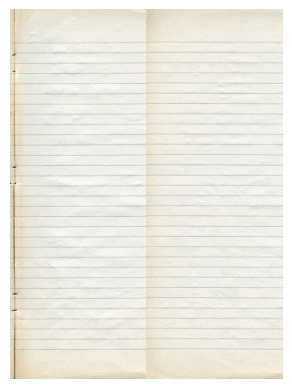

In [ ]:
from PIL import Image


input_image_path = "input_image.jpg"  # Replace with your input image path
fold_position = 0.5  # Adjust the fold position (0.0 to 1.0)

folded_image = fold_image(input_image_path, fold_position)
plt.imshow(folded_image)
plt.axis('off')  # Turn off axes
plt.show()
